# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [153]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [93]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [103]:
# Проверяем NaN
print(df['Freedom'].isnull().sum())

1


In [107]:
# выбросы есть
print('Номер строки с быбросом ', df['Freedom'].loc[df['Freedom'].isnull()])

Номер строки с быбросом  28   NaN
Name: Freedom, dtype: float64


In [154]:
# Удаляем выбросы c NaN зхначениями
df = df.dropna(axis='index', how='any', subset=['Freedom'])
df['Freedom'].isnull().sum()

0

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

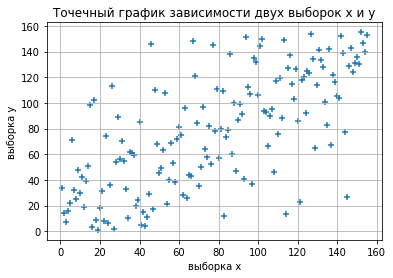

In [44]:
# построим точечный график зависимости двух переменных
y = df['Freedom']
x = df['Positive affect']

plt.xlabel('выборка x')
plt.ylabel('выборка y')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='+')

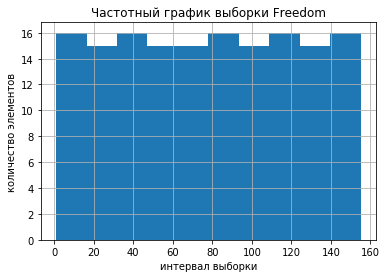

In [45]:
y = df['Freedom']
plt.hist(y,10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Freedom')
plt.grid(True)
plt.show()

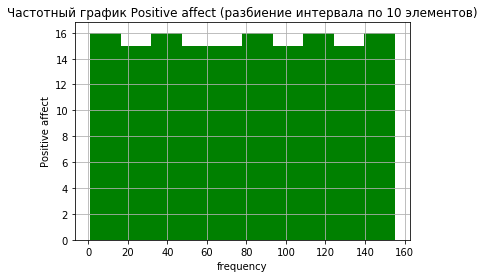

In [43]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Вывод: Оба распределения равномерные

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [96]:
# найдем медиану для df['Freedom'] 
print('Медиана - ',statistics.median(df['Freedom']))

Медиана -  78.0


In [97]:
# найдем Моду для df['Freedom']
moda = df['Freedom']
try :
    print('Мода - ',statistics.mode(moda))
except ValueError:
        print('Мода не найдена. Все значения уникальны.')


Мода не найдена. Все значения уникальны.


In [98]:
# проверяем так ли это
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
freedom_counts = {}
for p in df['Freedom']:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


Все значения встречаются по 1 разу, значит любое значение равно моде по данной формуле либо её нет.

In [99]:
# найдем мат ожидание для df['Freedom']
print('Математическое ожидание: ', statistics.mean(df['Freedom']),
' или вторым способом ', (sum(df['Freedom'])/len(df['Freedom'])))

Математическое ожидание:  78.0  или вторым способом  78.0


In [109]:
# смотрим стандартное отклонение, дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom
print('смотрим стандартное отклонение ',statistics.pstdev(df['Freedom']))
print('дисперсия ',statistics.pvariance(df['Freedom']))
print('минимум ',min(df['Freedom']))
print('максимум ',max(df['Freedom']))
freedom_range = max(df['Freedom']) - min(df['Freedom'])
print('размах для Freedom ',freedom_range)

смотрим стандартное отклонение  nan
дисперсия  nan
минимум  1.0
максимум  155.0
размах для Freedom  154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

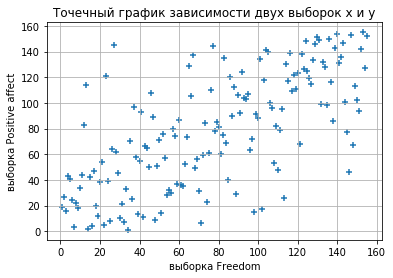

In [123]:
freedom = df['Freedom']
pos_effect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, pos_effect, marker='+')

In [136]:
# коэффициент Пирсона
from scipy.stats import pearsonr

p_pos_effect = list(pos_effect.dropna(axis='index', how='any'))
p_freedom = list(freedom.dropna(axis='index', how='any'))

corr, p_value = pearsonr(p_freedom, p_pos_effect)
print('коэффициент Пирсона равен : ', corr)

коэффициент Пирсона равен :  0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [142]:
freedom_norm = df['Freedom']
freedom_norm = freedom_norm.dropna(axis='index', how='any')
print('среднее (медиана)',statistics.mean(freedom_norm))
freedom_norm_1 = freedom_norm - statistics.mean(freedom_norm)
print('нормаль ',statistics.mean(freedom_norm_1))

среднее (медиана) 78.0
нормаль  0.0


In [140]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm_2 = min_max_scaler.fit_transform(np.array(freedom_norm).reshape(-1, 1))
print(min(freedom_norm_2))
print(max(freedom_norm_2))

[-1.]
[1.]


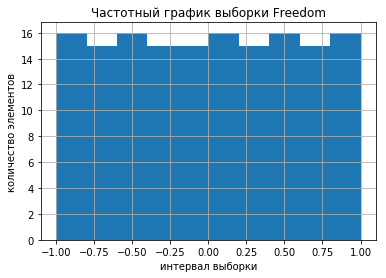

In [148]:
# смотрим на графике
y = freedom_norm_2
plt.hist(y,10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Freedom')
plt.grid(True)
plt.show()

Построить матрицу корреляций для всех колонок таблицы

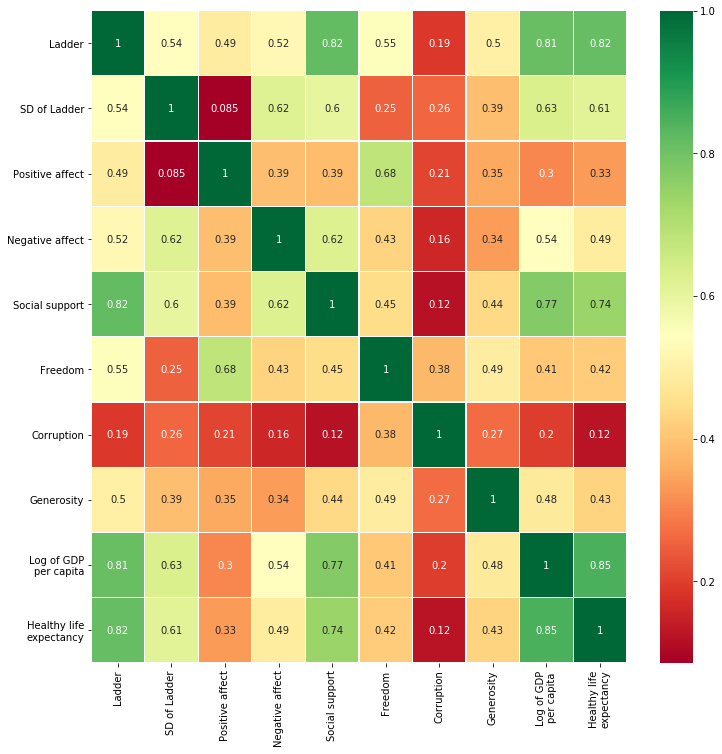

In [150]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [155]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
dfnew=pd.read_csv(url)
dfnew[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

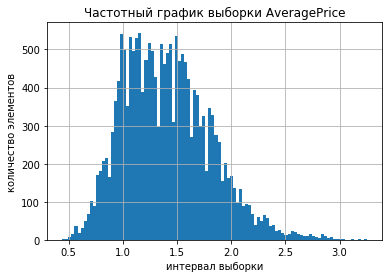

In [159]:
y = dfnew['AveragePrice']
plt.hist(y,100)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки AveragePrice')
plt.grid(True)
plt.show()

Ответ: AveragePrice это равномерное распределение.

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [161]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(dfnew[['4046', 'AveragePrice']])
dfnew_norm = pd.DataFrame(np_scaled)
print(dfnew_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


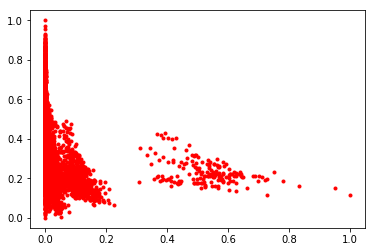

In [162]:
plt.plot(dfnew_norm[0], dfnew_norm[1], 'r.')
plt.show()

Вывод: похоже что кореляции не наблюдается...